# Testing LightGBM Using Titanic Dataset
Dataset: https://www.kaggle.com/c/titanic
Add feature explantations

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv("train.csv")

In [3]:
drop_features = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
                 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 
                 'Condition2', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 
                 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
                 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
                 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtFullBath',
                 'BsmtHalfBath', 'FullBath', 'HalfBath', 'KitchenQual', 'Functional', 'Fireplaces', 
                 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCond', 'PavedDrive', 
                 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 
                 'MiscFeature', 'MiscVal', 'MoSold']

In [4]:
data.drop(data[drop_features], axis=1, inplace=True)


In [5]:
data.columns

Index(['Id', 'LotFrontage', 'LotArea', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'MasVnrArea',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'GarageQual', 'WoodDeckSF', 'OpenPorchSF', 'YrSold',
       'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

In [9]:
import math

data['SalePrice'] = data['SalePrice'].apply(math.log)

In [10]:
data.head(10)

,Id,LotFrontage,LotArea,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,...,GarageYrBlt,GarageCars,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,YrSold,SaleType,SaleCondition,SalePrice
0,1,65.0,8450,1Fam,2Story,7,5,2003,2003,Gable,...,2003.0,2,548,TA,0,61,2008,WD,Normal,12.247694
1,2,80.0,9600,1Fam,1Story,6,8,1976,1976,Gable,...,1976.0,2,460,TA,298,0,2007,WD,Normal,12.109011
2,3,68.0,11250,1Fam,2Story,7,5,2001,2002,Gable,...,2001.0,2,608,TA,0,42,2008,WD,Normal,12.317167
3,4,60.0,9550,1Fam,2Story,7,5,1915,1970,Gable,...,1998.0,3,642,TA,0,35,2006,WD,Abnorml,11.849398
4,5,84.0,14260,1Fam,2Story,8,5,2000,2000,Gable,...,2000.0,3,836,TA,192,84,2008,WD,Normal,12.429216
5,6,85.0,14115,1Fam,1.5Fin,5,5,1993,1995,Gable,...,1993.0,2,480,TA,40,30,2009,WD,Normal,11.870600
6,7,75.0,10084,1Fam,1Story,8,5,2004,2005,Gable,...,2004.0,2,636,TA,255,57,2007,WD,Normal,12.634603
7,8,NaN,10382,1Fam,2Story,7,6,1973,1973,Gable,...,1973.0,2,484,TA,235,204,2009,WD,Normal,12.206073
8,9,51.0,6120,1Fam,1.5Fin,7,5,1931,1950,Gable,...,1931.0,2,468,Fa,90,0,2008,WD,Abnorml,11.774520
9,10,50.0,7420,2fmCon,1.5Unf,5,6,1939,1950,Gable,...,1939.0,1,205,Gd,0,4,2008,WD,Normal,11.678440


In [11]:
data.dtypes

Id                 int64
LotFrontage      float64
LotArea            int64
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
MasVnrArea       float64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
GrLivArea          int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
GarageQual        object
WoodDeckSF         int64
OpenPorchSF        int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice        float64
dtype: object

## Creating Training Dataset - All numerical + Dummifying Categorical

Categorical Columns Need to be defined as categorical

In [12]:
data["BldgType"] = data["BldgType"].astype('category');
data["HouseStyle"] = data["HouseStyle"].astype('category');
data["RoofStyle"] = data["RoofStyle"].astype('category');
data["GarageQual"] = data["GarageQual"].astype('category');
data["SaleCondition"] = data["SaleCondition"].astype('category');
data["SaleType"] = data["SaleType"].astype('category');

In [13]:
yvalues = data.pop('SalePrice')

There is a class imbalance

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(data, yvalues, test_size = 0.2, random_state = 10)

In [15]:
X_train.columns

Index(['Id', 'LotFrontage', 'LotArea', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'MasVnrArea',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'GarageQual', 'WoodDeckSF', 'OpenPorchSF', 'YrSold',
       'SaleType', 'SaleCondition'],
      dtype='object')

## Using LightGBM For Classification

In [16]:
import lightgbm as lgb;

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_9.4.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [18]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted'])

In [19]:
X_train.columns

Index(['Id', 'LotFrontage', 'LotArea', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'MasVnrArea',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'GarageQual', 'WoodDeckSF', 'OpenPorchSF', 'YrSold',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [20]:
def objective(params):
    learning_rate = 10. ** params[0]
    num_leaves = params[1]
    n_estimators = params[2]
    
    lgbm = lgb.LGBMRegressor(
                        learning_rate=learning_rate,
                        num_leaves=num_leaves,
                        max_depth=8,
                        n_estimators=n_estimators,
                        verbose=1,
                        )
    
    return math.sqrt(-np.mean(cross_val_score(lgbm, X_train, Y_train, cv=10, scoring='neg_mean_squared_error')))

Testing the function with arbitrary parameters

In [21]:
objective([-2.2380598356874204, 25, 207])

0.19800236480779218

## Using Bayesian Optimization For Hyperparameter Tuning

In [22]:
from skopt import gp_minimize

In [24]:
space = [(-5.0,0.0),(2,100),(2,300)]

r = gp_minimize(objective, space, n_calls=50, random_state=0,n_jobs=-1,verbose=True)

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 7.2285
Function value obtained: 0.1548
Current minimum: 0.1548
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 2.2641
Function value obtained: 0.1510
Current minimum: 0.1510
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 1.2152
Function value obtained: 0.3872
Current minimum: 0.1510
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 5.3383
Function value obtained: 0.3034
Current minimum: 0.1510
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 3.5187
Function value obtained: 0.3658
Current minimum: 0.1510
Iteration No: 6 started. Evaluating

Iteration No: 41 ended. Search finished for the next optimal point.
Time taken: 16.0119
Function value obtained: 0.1449
Current minimum: 0.1436
Iteration No: 42 started. Searching for the next optimal point.
Iteration No: 42 ended. Search finished for the next optimal point.
Time taken: 9.6605
Function value obtained: 0.1448
Current minimum: 0.1436
Iteration No: 43 started. Searching for the next optimal point.
Iteration No: 43 ended. Search finished for the next optimal point.
Time taken: 1.6450
Function value obtained: 0.1601
Current minimum: 0.1436
Iteration No: 44 started. Searching for the next optimal point.
Iteration No: 44 ended. Search finished for the next optimal point.
Time taken: 5.4017
Function value obtained: 0.1570
Current minimum: 0.1436
Iteration No: 45 started. Searching for the next optimal point.
Iteration No: 45 ended. Search finished for the next optimal point.
Time taken: 9.0819
Function value obtained: 0.1505
Current minimum: 0.1436
Iteration No: 46 started. Se

In [25]:
best_params = r.x
best_params

[-1.2069218783882132, 12, 143]

In [26]:
r.fun

0.14361766085291786

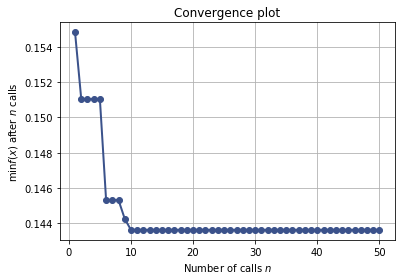

In [27]:
from skopt.plots import plot_convergence

plot_convergence(r);

## Move Parameters to Final LightGBM Model  

In [28]:
from sklearn.metrics import mean_squared_error

final_lgbm = lgb.LGBMRegressor(num_leaves=best_params[1],
                        learning_rate= 10 ** best_params[0],
                        n_estimators=best_params[2],
                        verbose=1)
    
final_lgbm.fit(X_train, Y_train)
Y_pred = final_lgbm.predict(X_test)

math.sqrt(mean_squared_error(Y_pred,Y_test))

0.149701031228132

In [29]:
best_params = r.x
best_params

[-1.2069218783882132, 12, 143]

## Submit To Kaggle For Real Test Data

In [34]:
X_submit = pd.read_csv("test.csv")

In [35]:
drop_features = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
                 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 
                 'Condition2', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 
                 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
                 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
                 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtFullBath',
                 'BsmtHalfBath', 'FullBath', 'HalfBath', 'KitchenQual', 'Functional', 'Fireplaces', 
                 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCond', 'PavedDrive', 
                 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 
                 'MiscFeature', 'MiscVal', 'MoSold']

In [36]:
X_submit.drop(X_submit[drop_features], axis=1, inplace=True)

In [37]:
X_submit["BldgType"] = X_submit["BldgType"].astype('category');
X_submit["HouseStyle"] = X_submit["HouseStyle"].astype('category');
X_submit["RoofStyle"] = X_submit["RoofStyle"].astype('category');
X_submit["GarageQual"] = X_submit["GarageQual"].astype('category');
X_submit["SaleCondition"] = X_submit["SaleCondition"].astype('category');
X_submit["SaleType"] = X_submit["SaleType"].astype('category');

In [38]:
X_submit.dtypes

Id                  int64
LotFrontage       float64
LotArea             int64
BldgType         category
HouseStyle       category
OverallQual         int64
OverallCond         int64
YearBuilt           int64
YearRemodAdd        int64
RoofStyle        category
MasVnrArea        float64
TotalBsmtSF       float64
1stFlrSF            int64
2ndFlrSF            int64
GrLivArea           int64
BedroomAbvGr        int64
KitchenAbvGr        int64
TotRmsAbvGrd        int64
GarageYrBlt       float64
GarageCars        float64
GarageArea        float64
GarageQual       category
WoodDeckSF          int64
OpenPorchSF         int64
YrSold              int64
SaleType         category
SaleCondition    category
dtype: object

In [39]:
print("Checking Feature Positins In Training vs Test data")
print(X_train.columns)
print(X_submit.columns)
print(False in (X_train.columns == X_submit.columns))


Checking Feature Positins In Training vs Test data
Index(['Id', 'LotFrontage', 'LotArea', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'MasVnrArea',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'GarageQual', 'WoodDeckSF', 'OpenPorchSF', 'YrSold',
       'SaleType', 'SaleCondition'],
      dtype='object')
Index(['Id', 'LotFrontage', 'LotArea', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'MasVnrArea',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'GarageQual', 'WoodDeckSF', 'OpenPorchSF', 'YrSold',
       'SaleType', 'SaleCondition'],
      dtype='object')
False


In [40]:
Y_lgbm_submit = final_lgbm.predict(X_submit)

In [41]:
lgbm_submit = pd.DataFrame(list(zip(X_submit['Id'],Y_lgbm_submit)),columns=['Id','SalePrice'])

In [43]:
lgbm_submit['SalePrice'] = lgbm_submit['SalePrice'].apply(math.exp)

In [45]:
lgbm_submit.to_csv("housing_lgbm_submit.csv",index=False)

# FINAL RESULT

## LightGBM w AutoTuning

![lr](lgbm_housing_2574.png)

# Thank You!